# **Muhammad Abdiel Firjatullah**

### Image Classification

In [23]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadabdiel","key":"72d441184fded30245450de4b744c9ac"}'}

In [25]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 99% 217M/219M [00:05<00:00, 15.0MB/s]
100% 219M/219M [00:05<00:00, 41.4MB/s]


In [32]:
zipPath = '../content/rice-image-dataset.zip'
zipFile = zipfile.ZipFile(zipPath, 'r')
zipFile.extractall('../content/RiceDataset/')
zipFile.close()

In [33]:
FILE_PATH = '../content/RiceDataset/Rice_Image_Dataset/'

In [55]:
import zipfile,os,shutil
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.preprocessing import image
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [35]:
arborio_dir = os.path.join(FILE_PATH,'Arborio')
basmati_dir = os.path.join(FILE_PATH, 'Basmati')
ipsala_dir = os.path.join(FILE_PATH, 'Ipsala')
jasmine_dir = os.path.join(FILE_PATH, 'Jasmine')
karacadag_dir = os.path.join(FILE_PATH, 'Karacadag')

In [37]:
total_arborio = len(os.listdir(arborio_dir))
total_basmati = len(os.listdir(basmati_dir))
total_ipsala = len(os.listdir(ipsala_dir))
total_jasmine = len(os.listdir(jasmine_dir))
total_karacadag = len(os.listdir(karacadag_dir))

print("Arborio Image      : ", total_arborio)
print("Basmati Image      : ", total_basmati)
print("Ipsala Image       : ", total_ipsala)
print("Jasmine Image      : ", total_jasmine)
print("Karacadag Image    : ", total_karacadag)

Arborio Image      :  15000
Basmati Image      :  15000
Ipsala Image       :  15000
Jasmine Image      :  15000
Karacadag Image    :  15000


In [38]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 64

In [39]:
val_size = 0.2

Train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = val_size
)

In [40]:
Train_generator = Train_datagen.flow_from_directory(
    FILE_PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training'
)

Validation_generator = Validation_datagen.flow_from_directory(
    FILE_PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='validation'
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [41]:
target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [43]:
Model = Sequential(
    [
      Conv2D(filters = 16, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
      MaxPooling2D(pool_size = (2,2)),
      Dropout(0.2),
      BatchNormalization(),

      Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu'),
      MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      Dropout(0.2),

      Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'),
      MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      Dropout(0.2),

      Flatten(),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(5, activation='softmax')
    ]
)

In [44]:
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
class EarlyStopByAccuracy(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95):
			print("\nAccuracy and Validation Accuracy has reached 95%!\nStop Train!")
			self.model.stop_training = True

callbacks = EarlyStopByAccuracy()

EarlyStop = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 5,
    verbose = 1,
    mode = 'auto'
)

In [52]:
history = Model.fit(
  Train_generator,
  epochs =  100,
  validation_data = Validation_generator,
  verbose = 1,
  callbacks =[callbacks, EarlyStop]
)

Epoch 1/100
938/938 [==============================] - 2261s 2s/step - loss: 0.1795 - accuracy: 0.9396 - val_loss: 0.0500 - val_accuracy: 0.9837
Epoch 2/100
938/938 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9735
Accuracy and Validation Accuracy has reached 95%!
Stop Train!
938/938 [==============================] - 2285s 2s/step - loss: 0.0820 - accuracy: 0.9735 - val_loss: 0.1100 - val_accuracy: 0.9597


Loss with Val_Loss Graph


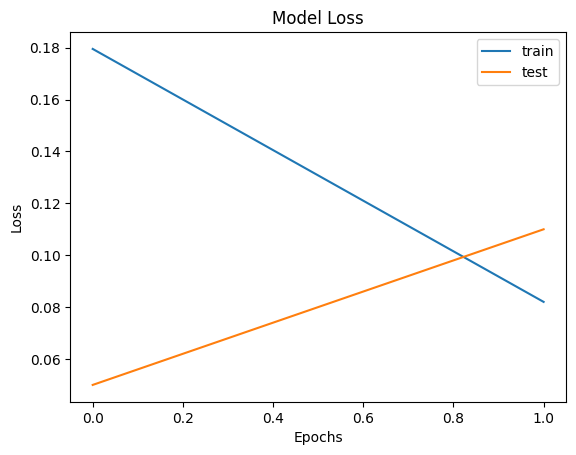

Acc with Val_Acc Graph


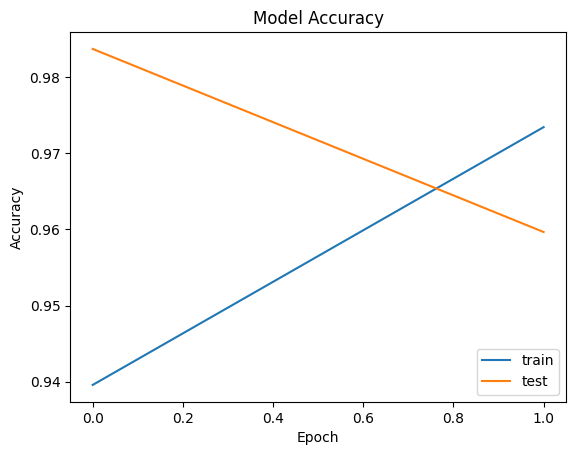

In [54]:
print("Loss with Val_Loss Graph")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

print("Acc with Val_Acc Graph")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [57]:
export_dir = 'saved_model/'
tf.saved_model.save(Model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('RiceModel.tflite')
tflite_model_file.write_bytes(tflite_model)

5412308